<a href="https://colab.research.google.com/github/Machuge27/reference-en/blob/master/TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import the TensorFlow library, which is used for building and training machine learning models.

Access the **MNIST** dataset available in TensorFlow's Keras API. It contains 70,000 grayscale images of handwritten digits (0-9).

*mnist.load_data()* loads the dataset and splits it into training and testing sets.
*x_train**  contains the images for training, and
*y_train*  contains the corresponding labels (the actual digits).

x_test and y_test are for testing the model after training.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


The pixel values of images range from 0 to 255. Dividing by 255.0 normalizes these values to be between 0 and 1, which helps the model learn better and faster.

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Building the model
- **Sequential Model**: This creates a linear stack of layers.
- **Flatten Layer**: Converts the 2D 28x28 images into a 1D array of 784 pixels. This is the input layer.
- **Dense Layer (128 units)**: A fully connected layer with 128 neurons using the ReLU (Rectified Linear Unit) activation function. ReLU helps to introduce non-linearity into the model.
- **Dropout Layer**: Randomly drops 20% of the neurons during training to prevent overfitting, which helps the model generalize better.
- **Dense Layer (10 units)**: The output layer with 10 neurons (one for each digit 0-9) using the softmax activation function. This outputs probabilities for each class.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- **Optimizer**: `adam` is an optimization algorithm that adjusts the learning rate during training.
- **Loss Function**: `sparse_categorical_crossentropy` is used because we have integer labels (0-9) and need to compute the difference between predicted probabilities and actual classes.
- **Metrics**: We track accuracy during training and evaluation.

In [4]:

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])



In [5]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8601 - loss: 0.4779
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9574 - loss: 0.1450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9673 - loss: 0.1069
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9742 - loss: 0.0850
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.0720
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9740 - loss: 0.0831


[0.0691080093383789, 0.9775999784469604]

In [6]:
# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0621 - val_accuracy: 0.9790 - val_loss: 0.0699
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9817 - loss: 0.0561 - val_accuracy: 0.9786 - val_loss: 0.0691
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0466 - val_accuracy: 0.9784 - val_loss: 0.0737
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9857 - loss: 0.0446 - val_accuracy: 0.9803 - val_loss: 0.0670
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0401 - val_accuracy: 0.9801 - val_loss: 0.0690
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0821
Test accuracy: 0.9801


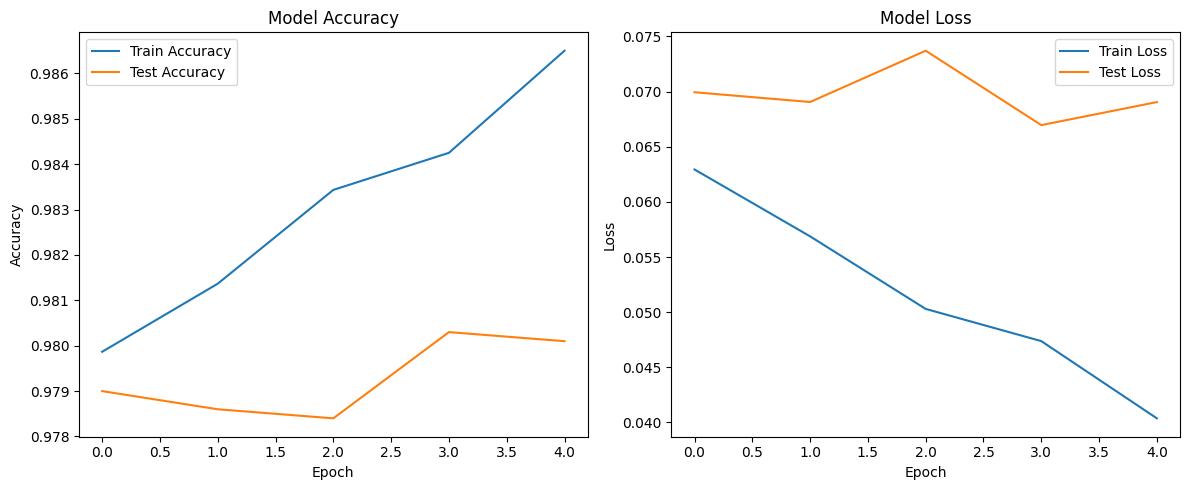

In [8]:
# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()